In [1]:
#import some necessary librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "./dataset-0506"]).decode("utf8")) #check the files available in the directory

fields.pdf
submit_test.csv
test.csv
train.csv



In [2]:
#Now let's import and put the train and test datasets in  pandas dataframe
train = pd.read_csv('./dataset-0506/train.csv')
test = pd.read_csv('./dataset-0506/test.csv')
print(train.shape,'->',test.shape)

(60000, 235) -> (10000, 234)


In [3]:
##display the first five rows of the train dataset.
train.head(5)

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,nan,...,58,1,157,1,2483,1,6011,1,34.470,647603.770
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,nan,...,28,1,115,1,15872,1,32221,1,40.074,3321452.000
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,nan,...,78,1,212,1,15760,1,32228,1,54.462,9570885.316
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,nan,...,20,1,125,1,2568,1,7271,1,99.629,14215011.127
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,nan,...,18,1,47,1,2587,1,7442,1,124.131,762711.976


In [4]:
##display the first five rows of the test dataset.
test.head(5)

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,X5gsdTWGS3W7JJQB,1,13,18634,2,4,2,1857,2,nan,...,7,21,1,129,1,3991,1,8409,1,105.462
1,BTshNOJyKHnT2YIT,8,7,20199,10,3,2,16011,2,nan,...,18,44,1,67,1,1950,1,10725,1,100.820
2,dhdymr0lV8N5kZOT,8,12,19769,4,4,10,18294,2,nan,...,0,3,1,35,1,3707,1,19459,1,259.801
3,VEwyGGMcD56w5BOc,10,7,20479,19,2,0,17837,2,nan,...,16,60,1,144,1,6487,1,29400,1,22.942
4,wmUeMoJZfsqaSX9b,8,3,18164,13,0,2,13272,2,nan,...,4,18,1,76,1,1346,1,3280,1,181.213


**Save and Remove Building ID**

In [5]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))
#Save the 'building_id' column
train_ID = train['building_id']
test_ID = test['building_id']

#Now drop the  'building_id' colum since it's unnecessary for  the prediction process.
train.drop("building_id", axis = 1, inplace = True)
test.drop("building_id", axis = 1, inplace = True)

#check again the data size after dropping the 'building_id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (60000, 235) 
The test data size before dropping Id feature is : (10000, 234) 

The train data size after dropping Id feature is : (60000, 234) 
The test data size after dropping Id feature is : (10000, 233) 


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


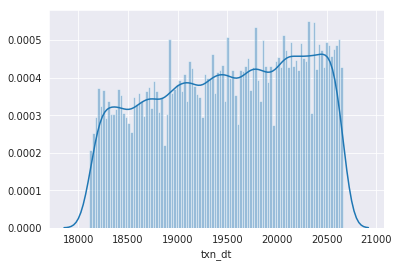

In [6]:
sns.distplot(train['txn_dt'],hist=True,bins=100)

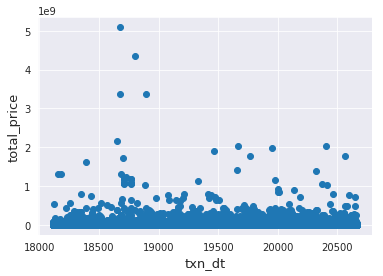

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = train['txn_dt'], y = train['total_price'])
plt.ylabel('total_price', fontsize=13)
plt.xlabel('txn_dt', fontsize=13)
plt.show()

# Data Preprocess

## target variable process
**Log-transformation of the target variable**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 12937270.81 and sigma = 55224170.14



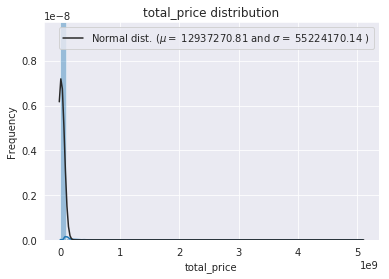

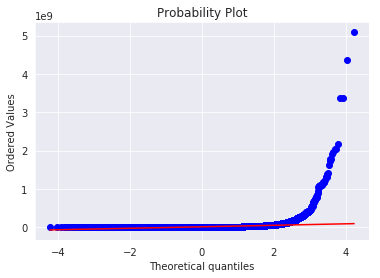

In [8]:
sns.distplot(train['total_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['total_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('total_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['total_price'], plot=plt)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 15.52 and sigma = 1.17



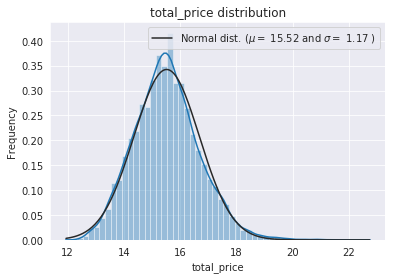

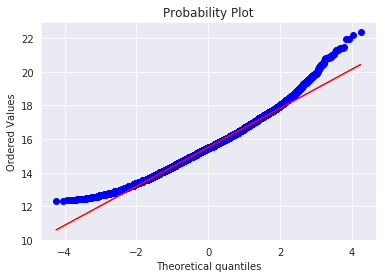

In [9]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["total_price"] = np.log1p(train["total_price"])

#Check the new distribution 
sns.distplot(train['total_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['total_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('total_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['total_price'], plot=plt)
plt.show()

# 特徵工程 Features engineering

In [10]:
# concatenate the train and test data
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['total_price'].values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['total_price'], axis=1, inplace=True)
print(f"all_data size is : {all_data.shape}, y_train size: {y_train.shape}")

all_data size is : (70000, 233), y_train size: (60000,)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


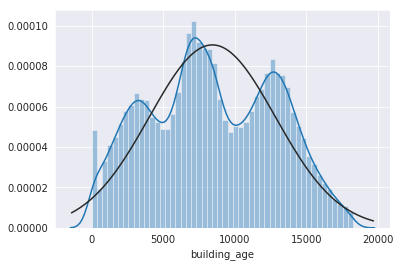

In [11]:
# txn_dt - building_complete_dt
all_data['building_age'] = (all_data['txn_dt'] - all_data['building_complete_dt'])
sns.distplot(all_data['building_age'] , fit=norm);

**Data Correlation**

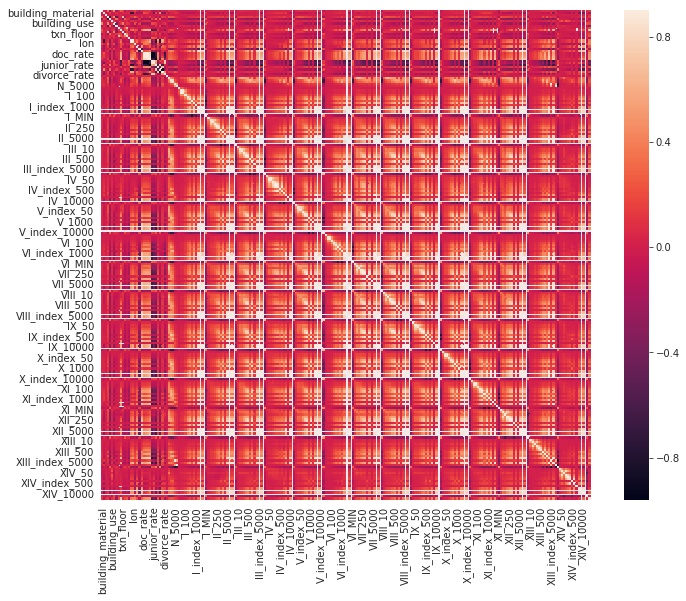

In [12]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
# building_material 建材
# building_use 建物用途
# txn_floor 交易樓層
# lon 建物經度
# doc_rate 博士教育程度人口占比
# junior_rate 所在縣市國中教育程度人口占比

## 填補缺失值

In [13]:
# 檢查欄位缺值數量 (去掉.head()可以顯示全部)
all_data.isnull().sum().sort_values(ascending=False).head()

parking_area             66397
parking_price            53775
txn_floor                18541
village_income_median     1326
building_age                 0
dtype: int64

In [14]:
# figure all missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()
# missing features
# parking_area    94% 車位面積
# parking_price   76% 車位價格
# txn_floor       26% 交易樓層
# village_income_median 1.89% 里年收入中位數

,Missing Ratio
parking_area,94.853
parking_price,76.821
txn_floor,26.487
village_income_median,1.894


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


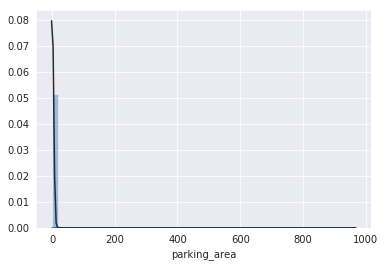

In [15]:
# Handle Missing Features parking_area
all_data["parking_area"] = all_data["parking_area"].fillna(0)

#Check the new distribution 
sns.distplot(all_data['parking_area'] , fit=norm);

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


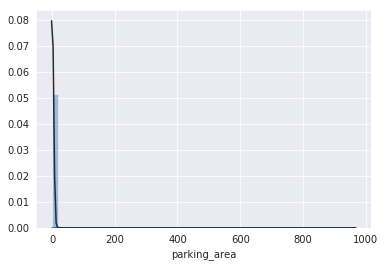

In [16]:
all_data["parking_price"] = all_data["parking_price"].fillna(0)

#Check the new distribution 
sns.distplot(all_data['parking_area'] , fit=norm);

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


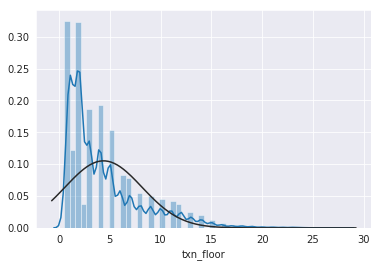

In [17]:
all_data["txn_floor"] = all_data["txn_floor"].fillna((all_data["total_floor"]+1)/2.0)

#Check the new distribution 
sns.distplot(all_data['txn_floor'] , fit=norm);

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


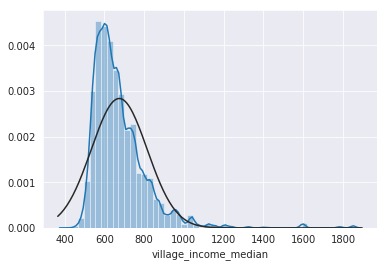

In [18]:
all_data["village_income_median"]  = all_data['village_income_median'].fillna(axis=0, method='ffill')

#Check the new distribution 
sns.distplot(all_data['village_income_median'] , fit=norm);

## 數值型特徵
**去離群值**
**去偏態**
**特徵縮放**

In [19]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(all_data.dtypes, all_data.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
        
print(f'{len(num_features)} Numeric Features : {num_features}\n')

234 Numeric Features : ['III_10', 'III_100', 'III_1000', 'III_10000', 'III_250', 'III_50', 'III_500', 'III_5000', 'III_MIN', 'III_index_1000', 'III_index_10000', 'III_index_50', 'III_index_500', 'III_index_5000', 'II_10', 'II_100', 'II_1000', 'II_10000', 'II_250', 'II_50', 'II_500', 'II_5000', 'II_MIN', 'II_index_1000', 'II_index_10000', 'II_index_50', 'II_index_500', 'II_index_5000', 'IV_10', 'IV_100', 'IV_1000', 'IV_10000', 'IV_250', 'IV_50', 'IV_500', 'IV_5000', 'IV_MIN', 'IV_index_1000', 'IV_index_10000', 'IV_index_50', 'IV_index_500', 'IV_index_5000', 'IX_10', 'IX_100', 'IX_1000', 'IX_10000', 'IX_250', 'IX_50', 'IX_500', 'IX_5000', 'IX_MIN', 'IX_index_1000', 'IX_index_10000', 'IX_index_50', 'IX_index_500', 'IX_index_5000', 'I_10', 'I_100', 'I_1000', 'I_10000', 'I_250', 'I_50', 'I_500', 'I_5000', 'I_MIN', 'I_index_1000', 'I_index_10000', 'I_index_50', 'I_index_500', 'I_index_5000', 'N_1000', 'N_10000', 'N_50', 'N_500', 'N_5000', 'VIII_10', 'VIII_100', 'VIII_1000', 'VIII_10000', 'VI

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import time
from sklearn.ensemble import GradientBoostingRegressor

x_train = all_data[:ntrain]

# estimator = LinearRegression()
# cross_val_score(estimator, x_train, y_train, cv=5).mean()

# estimator = GradientBoostingRegressor()
# start = time.time()
# print(f'shape : {x_train.shape}')
# print(f'score : {cross_val_score(estimator, x_train, y_train, cv=5).mean()}')
# print(f'time : {time.time() - start} sec')
# shape : (60000, 234)
# score : 0.9336887325748057
# time : 204.60381722450256 sec

shape : (60000, 234)
score : 0.9336887325748057
time : 204.60381722450256 sec


**Skewed features**

In [21]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
parking_area,151.993
building_area,82.106
land_area,42.577
VI_10,28.645
XIII_10,27.478
XIII_50,18.478
IV_10,17.640
X_10,17.427
XIII_100,16.426
I_10,15.265


## 類別型特徵
**類別型特徵處理理**

In [22]:
# Label Encoding some categorical variable
from sklearn.preprocessing import LabelEncoder
cols = ['building_type', 'building_use']
for feature in cols:
    print(all_data[feature].unique())
    all_data[feature] = all_data[feature].astype(str)

print(all_data.shape)
all_data = pd.get_dummies(all_data)
print(all_data.shape)

[3 1 0 4 2]
[ 2  1  6 10  8  5  0  3  4  7]
(70000, 234)
(70000, 247)


In [24]:
# x_train = all_data[:ntrain]
# estimator = GradientBoostingRegressor()
# start = time.time()
# print(f'shape : {x_train.shape}')
# print(f'score : {cross_val_score(estimator, x_train, y_train, cv=5).mean()}')
# print(f'time : {time.time() - start} sec')
# shape : (60000, 247)
# score : 0.9340604080394396
# time : 208.69866728782654 sec

shape : (60000, 247)
score : 0.9340604080394396
time : 208.69866728782654 sec


## 時間型特徵
**時間特徵分解**
**週期循環特徵**

# Build Model

In [27]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [31]:
x_train = all_data[:ntrain]
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
start = time.time()
print(f'shape : {x_train.shape}')
model_xgb.fit(x_train, y_train)
print(f'time : {time.time() - start} sec')

In [36]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

xgb_train_pred = model_xgb.predict(x_train)
print(rmsle(y_train, xgb_train_pred))

0.20300836247539414


# Predict

In [32]:
test = all_data[ntrain:]

print(f'shape : {test.shape}')
xgb_pred = model_xgb.predict(test)
print(f'time : {time.time() - start} sec')

shape : (10000, 247)
time : 398.53321957588196 sec


In [33]:
xgb_pred = np.expm1(xgb_pred)

In [35]:
sub = pd.DataFrame()
sub['building_id'] = test_ID
sub['total_price'] = xgb_pred
sub.to_csv('submission.csv',index=False)